In [2]:
import os 
import sys
# fix this later!
# sys.path.insert(0, '/home/sumry2023_cqx3/hypergraph_scattering')
from hypgs.models.hyper_scattering_net import HSN

import dhg 
import torch 
import torch.optim as optim

from typing import Tuple, Optional 
from dhg.random import set_seed
from dhg import Graph
from dhg.models import GCN
from dhg.metrics import GraphVertexClassificationEvaluator as Evaluator
import time
import torch.nn.functional as F
import torch.nn as nn
import random
from tqdm import trange
import matplotlib.pyplot as plt

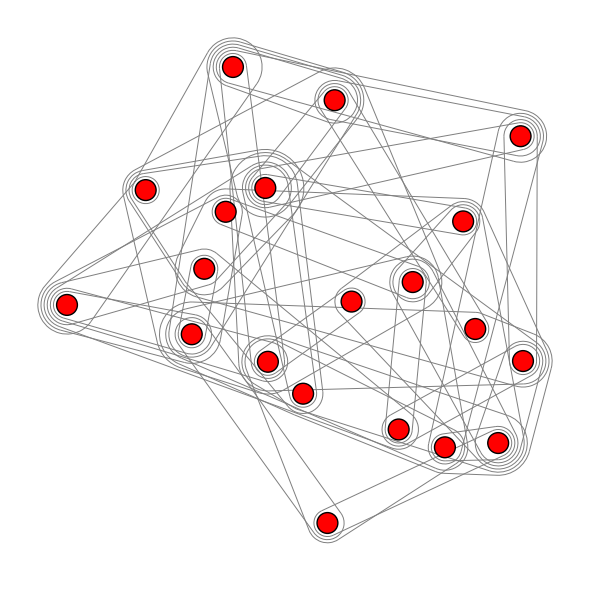

In [3]:
num_v = 20
num_e = 40
hg = dhg.random.hypergraph_Gnm(num_v, num_e, method = 'low_order_first')
hg.draw()

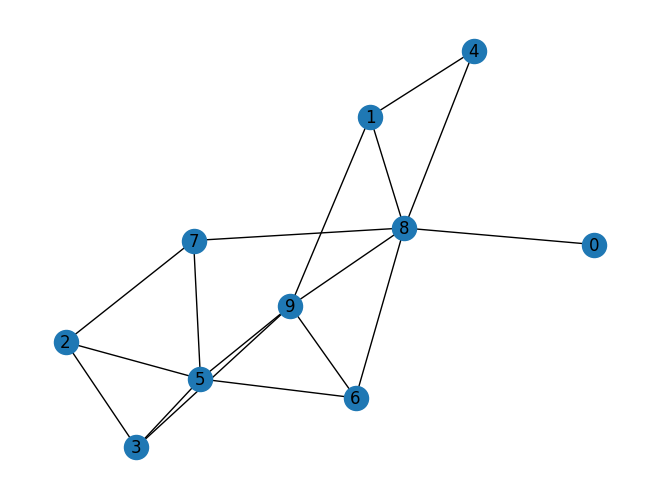

In [5]:
# visualize converting an ER graph into a hypergraph with the desired features
import torch
from torch_geometric.utils import from_networkx

import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph using NetworkX
G = nx.fast_gnp_random_graph(10, 0.3)  # Generate a random graph with 10 nodes and edge probability 0.3

# Visualize the generated graph (optional)
nx.draw(G, with_labels=True)
plt.show()

# Convert NetworkX graph to PyTorch Geometric data object
data = from_networkx(G)


In [11]:
data.edge_index.shape

torch.Size([2, 34])

In [9]:
data

Data(edge_index=[2, 34], num_nodes=10)

In [21]:
[list(edge) for edge in data.edge_index.T]

[[tensor(0), tensor(8)],
 [tensor(1), tensor(4)],
 [tensor(1), tensor(8)],
 [tensor(1), tensor(9)],
 [tensor(2), tensor(3)],
 [tensor(2), tensor(5)],
 [tensor(2), tensor(7)],
 [tensor(3), tensor(2)],
 [tensor(3), tensor(5)],
 [tensor(3), tensor(9)],
 [tensor(4), tensor(1)],
 [tensor(4), tensor(8)],
 [tensor(5), tensor(2)],
 [tensor(5), tensor(3)],
 [tensor(5), tensor(6)],
 [tensor(5), tensor(7)],
 [tensor(5), tensor(9)],
 [tensor(6), tensor(5)],
 [tensor(6), tensor(8)],
 [tensor(6), tensor(9)],
 [tensor(7), tensor(2)],
 [tensor(7), tensor(5)],
 [tensor(7), tensor(8)],
 [tensor(8), tensor(0)],
 [tensor(8), tensor(1)],
 [tensor(8), tensor(4)],
 [tensor(8), tensor(6)],
 [tensor(8), tensor(7)],
 [tensor(8), tensor(9)],
 [tensor(9), tensor(1)],
 [tensor(9), tensor(3)],
 [tensor(9), tensor(5)],
 [tensor(9), tensor(6)],
 [tensor(9), tensor(8)]]

In [19]:
hg = dhg.Hypergraph(data.num_nodes, [list(edge) for edge in data.edge_index.T])

/home/sumry2023_cqx3/.conda/envs/hyper/lib/python3.10/site-packages/dhg/visualization/structure/simulator.py:141: RuntimeWarning: divide by zero encountered in divide
  f_scale = k / (dist ** 2)  # (m, m)
/home/sumry2023_cqx3/.conda/envs/hyper/lib/python3.10/site-packages/dhg/visualization/structure/simulator.py:150: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(H, f)


AssertionError: 

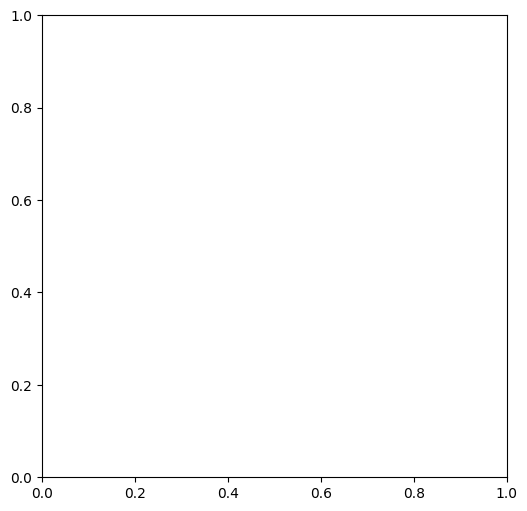

In [20]:
hg.draw()

In [ ]:
hg = dhg.random.hypergraph_Gnm(num_v, num_e, method = 'low_order_first')


In [5]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
num_vertices = 15
hg = dhg.random.uniform_hypergraph_Gnp(3,num_vertices, .4).to(device)
signal_features = 2
X = torch.rand(num_vertices, signal_features).to(device)
Y = torch.zeros((hg.num_e, signal_features)).to(device)

hidden_channels = 16
out_channels = 1
net = HSN(signal_features, hidden_channels, 1).to(device)
#import pdb; pdb.set_trace()

node_pred, edge_pred = net(hg, X, Y)
node_pred.shape

torch.Size([15, 1])

In [6]:
num_v = 15; num_e = 30
hypergraph_dataset = [dhg.random.hypergraph_Gnm(num_v, num_e, method = 'low_order_first') for _ in range(50)]


In [10]:
net = HSN(signal_features, hidden_channels, 1).to(device)
random.shuffle(hypergraph_dataset)
for hg in hypergraph_dataset:
    hg = hg.to(device)
    signal_features = 2
    X = torch.rand(num_v, signal_features).to(device)
    Y = torch.zeros((hg.num_e, signal_features)).to(device)
    node_pred, edge_pred = net(hg, X, Y)